# Develop a python Script in Ipynb for various colour model:   
   1. RGB  2. CMY  3. YIQ   4. YUV   5. HIS  6. HCV   7. HSV

### RGB Model

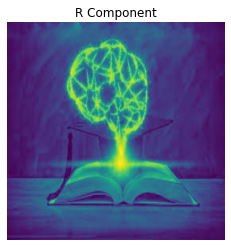

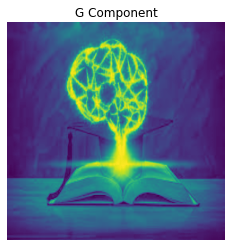

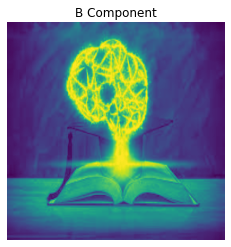

In [27]:
import cv2
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt # Will use matplotlib for showing the image
%matplotlib inline 

image = cv2.imread('download.jpeg')

image = cv2.resize(image, (300, 300))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

B = image[:,:,0:1]

G = image[:,:,1:2]

R = image[:,:,2:3]

plt.axis("off")
plt.title('R Component')
plt.imshow(R)
plt.show()
plt.axis("off")
plt.title('G Component')
plt.imshow(G)
plt.show()
plt.axis("off")
plt.title('B Component')
plt.imshow(B)
plt.show()

### CMY Model

In [5]:
C = 255 - R
M = 255 - G
Y = 255 - B

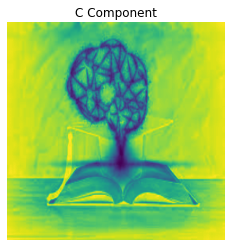

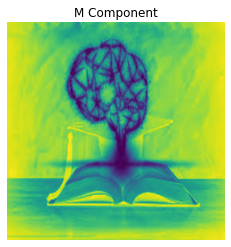

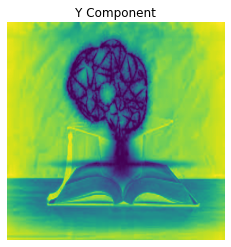

In [6]:
plt.axis("off")
plt.title('C Component')
plt.imshow(C)
plt.show()
plt.axis("off")
plt.title('M Component')
plt.imshow(M)
plt.show()
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()

### YIQ Model

In [8]:
Y = 0.299*R + 0.587*G + 0.114*B
I = 0.596*R - 0.275*G - 0.321*B
Q = 0.212*R - 0.523*G + 0.311*B 

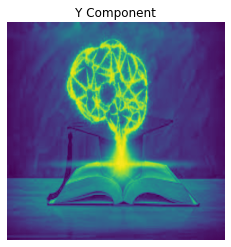

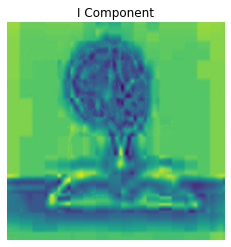

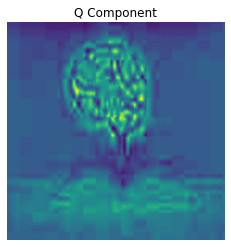

In [9]:
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()
plt.axis("off")
plt.title('I Component')
plt.imshow(I)
plt.show()
plt.axis("off")
plt.title('Q Component')
plt.imshow(Q)
plt.show()

### YUV Model

In [13]:
Y = 0.299 * R + 0.587 * G + 0.114 * B
U = 0.493 * (B - Y )
V = 0.877 * (R - Y )

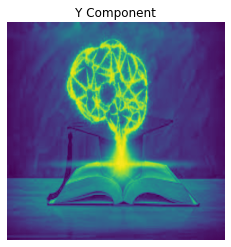

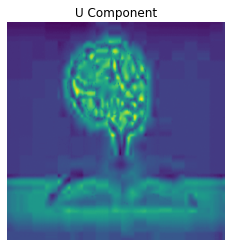

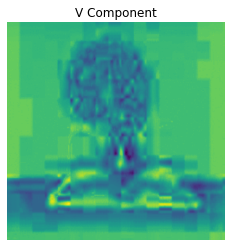

In [14]:
plt.axis("off")
plt.title('Y Component')
plt.imshow(Y)
plt.show()
plt.axis("off")
plt.title('U Component')
plt.imshow(U)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()

### HIS Model

In [19]:
def RGB_TO_HSI(img):

    with np.errstate(divide='ignore', invalid='ignore'):

        #Load image with 32 bit floats as variable type
        bgr = np.float32(img)/255

        #Separate color channels
        blue = bgr[:,:,0]
        green = bgr[:,:,1]
        red = bgr[:,:,2]

        #Calculate Intensity
        def calc_intensity(red, blue, green):
            return np.divide(blue + green + red, 3)

        #Calculate Saturation
        def calc_saturation(red, blue, green):
            minimum = np.minimum(np.minimum(red, green), blue)
            saturation = 1 - (3 / (red + green + blue + 0.001) * minimum)

            return saturation

        #Calculate Hue
        def calc_hue(red, blue, green):
            hue = np.copy(red)

            for i in range(0, blue.shape[0]):
                for j in range(0, blue.shape[1]):
                    hue[i][j] = 0.5 * ((red[i][j] - green[i][j]) + (red[i][j] - blue[i][j])) / \
                                math.sqrt((red[i][j] - green[i][j])**2 +
                                        ((red[i][j] - blue[i][j]) * (green[i][j] - blue[i][j])))
                    hue[i][j] = math.acos(hue[i][j])

                    if blue[i][j] <= green[i][j]:
                        hue[i][j] = hue[i][j]
                    else:
                        hue[i][j] = ((360 * math.pi) / 180.0) - hue[i][j]

            return hue
       
        return calc_hue(red, blue, green), calc_saturation(red, blue, green), calc_intensity(red, blue, green)

In [20]:
img = cv2.imread('download.jpeg', 1)
H, S, I = RGB_TO_HSI(img)

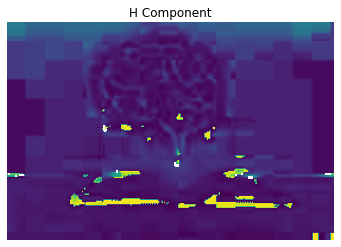

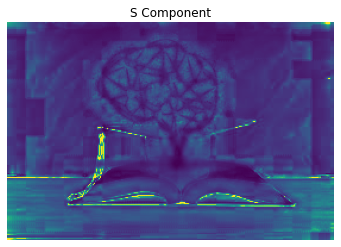

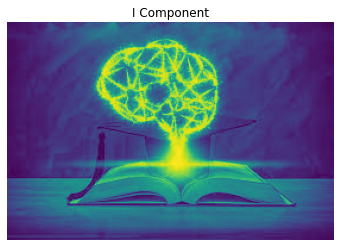

In [21]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('S Component')
plt.imshow(S)
plt.show()
plt.axis("off")
plt.title('I Component')
plt.imshow(I)
plt.show()

### HCV Model

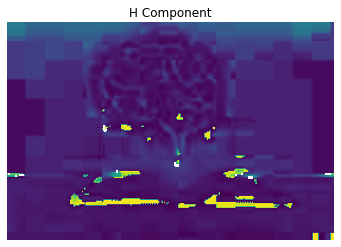

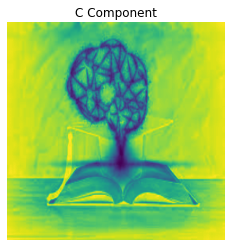

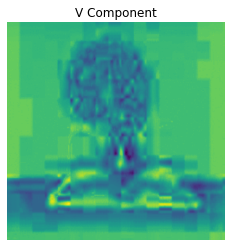

In [31]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('C Component')
plt.imshow(C)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()

### HSV Model

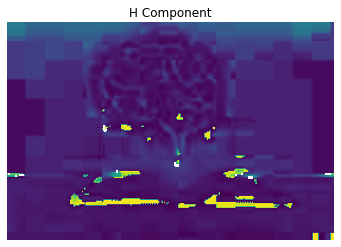

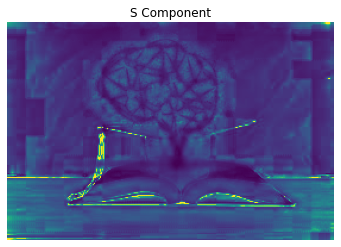

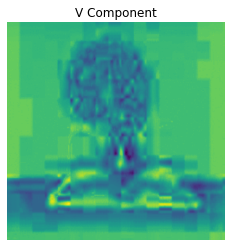

In [32]:
plt.axis("off")
plt.title('H Component')
plt.imshow(H)
plt.show()
plt.axis("off")
plt.title('S Component')
plt.imshow(S)
plt.show()
plt.axis("off")
plt.title('V Component')
plt.imshow(V)
plt.show()